--- 📊 FUNDAMENTAL SUMMARY ---
Total Invested:   ₹4,500,000
Final Value:      ₹16,921,577
Total Profit:     ₹12,421,577
------------------------------

--- 🏆 WEALTH MILESTONES (When did you hit them?) ---
✅ Hit 10 Lakhs in: Year 3, Month 33
✅ Hit 25 Lakhs in: Year 6, Month 65
✅ Hit 50 Lakhs in: Year 9, Month 101
✅ Hit 1 CRORE in: Year 12, Month 144
✅ Hit 1.5 CRORES in: Year 15, Month 172

--- 📅 YEARLY GROWTH SNAPSHOT (Last 5 Years) ---
      Yearly_Investment  Total_Interest_Earned
Year                                          
11               300000           1.145413e+06
12               300000           1.377770e+06
13               300000           1.647479e+06
14               300000           1.960545e+06
15               300000           2.323938e+06


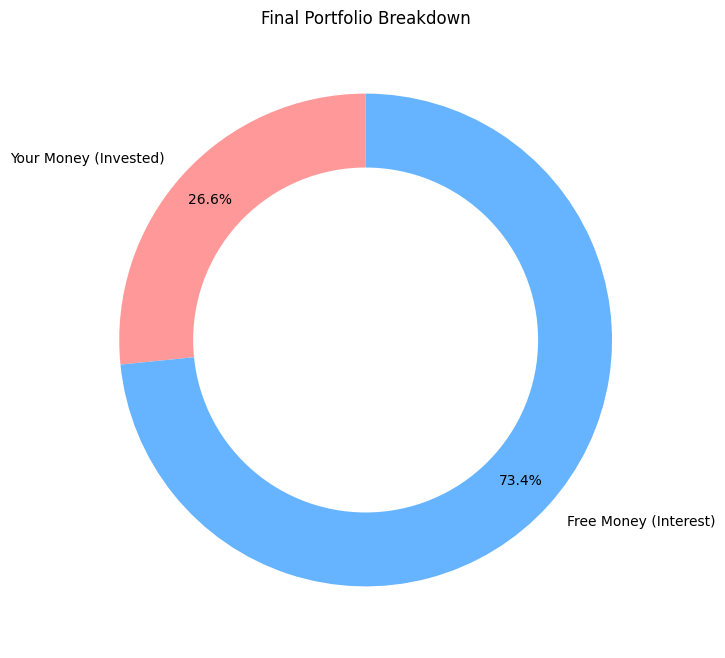

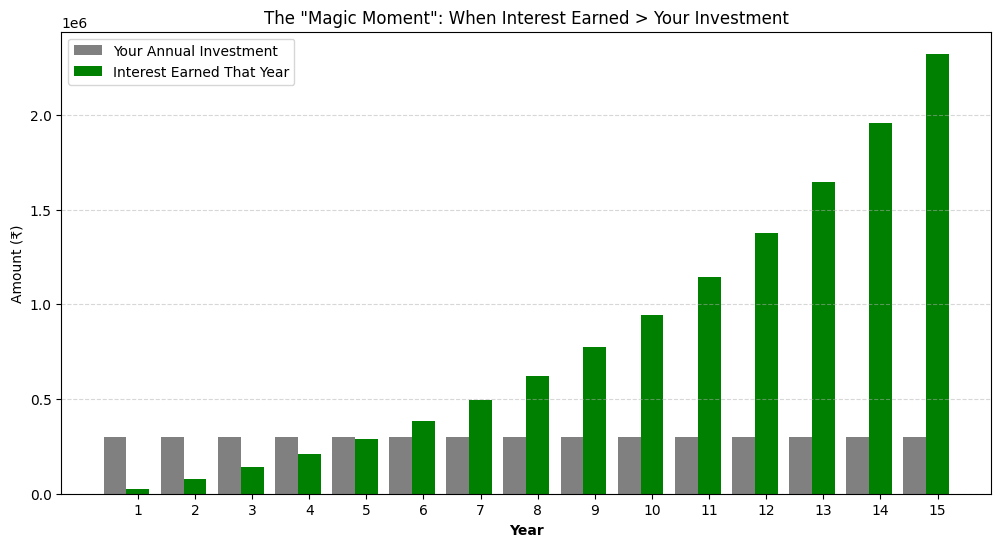

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# PART 1: YOUR ORIGINAL STRATEGY (Recreated)
# ==========================================

# Variables from your file
monthly_investment = 25000
expected_return_rate = 0.15  # 15%
years = 15

# Basic Calculations
months = years * 12
monthly_rate = expected_return_rate / 12

data = []
future_value = 0
total_invested = 0

# The Loop (Same logic as your file)
for m in range(1, months + 1):
    total_invested += monthly_investment

    # Interest is earned on the previous value + new investment
    interest_earned = (future_value + monthly_investment) * monthly_rate
    future_value = (future_value + monthly_investment) + interest_earned

    data.append({
        "Month": m,
        "Year": (m-1) // 12 + 1,
        "Invested": total_invested,
        "Interest_Earned_This_Month": interest_earned,
        "Portfolio_Value": future_value
    })

df = pd.DataFrame(data)

# ==========================================
# PART 2: NEW ADDITIONAL ANALYSIS
# ==========================================

print("--- 📊 FUNDAMENTAL SUMMARY ---")
print(f"Total Invested:   ₹{total_invested:,.0f}")
print(f"Final Value:      ₹{future_value:,.0f}")
print(f"Total Profit:     ₹{future_value - total_invested:,.0f}")
print("-" * 30)

# --- ANALYSIS A: The "Crorepati" Milestones ---
# When do you cross 50 Lakhs, 1 Cr, etc.?
print("\n--- 🏆 WEALTH MILESTONES (When did you hit them?) ---")
milestones = [1000000, 2500000, 5000000, 10000000, 15000000] # 10L, 25L, 50L, 1Cr, 1.5Cr
milestone_names = ["10 Lakhs", "25 Lakhs", "50 Lakhs", "1 CRORE", "1.5 CRORES"]

for value, name in zip(milestones, milestone_names):
    # Find the first row where Portfolio Value crosses the milestone
    hit = df[df['Portfolio_Value'] >= value]
    if not hit.empty:
        row = hit.iloc[0]
        print(f"✅ Hit {name} in: Year {int(row['Year'])}, Month {int(row['Month'])}")
    else:
        print(f"❌ Could not hit {name} in this time period")

# --- ANALYSIS B: Yearly Breakdown (The Power of Compounding) ---
# Group data by Year to see how much interest you earn annually
yearly_df = df.groupby('Year')[['Invested', 'Interest_Earned_This_Month', 'Portfolio_Value']].sum()
yearly_df['Yearly_Investment'] = monthly_investment * 12
yearly_df['Total_Interest_Earned'] = yearly_df['Interest_Earned_This_Month'] # Renaming for clarity

print("\n--- 📅 YEARLY GROWTH SNAPSHOT (Last 5 Years) ---")
print(yearly_df[['Yearly_Investment', 'Total_Interest_Earned']].tail())


# ==========================================
# PART 3: ADVANCED VISUALIZATION
# ==========================================

# 1. PIE CHART: Invested vs. Profit
plt.figure(figsize=(8, 8))
slices = [total_invested, future_value - total_invested]
labels = ['Your Money (Invested)', 'Free Money (Interest)']
colors = ['#ff9999','#66b3ff']
plt.pie(slices, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
# Draw circle to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Final Portfolio Breakdown")
plt.show()

# 2. BAR CHART: Investment vs Interest Earned per Year
# This proves that in later years, Interest > Your Investment
years_arr = yearly_df.index
r1 = np.arange(len(years_arr))
barWidth = 0.4

plt.figure(figsize=(12, 6))
plt.bar(r1, yearly_df['Yearly_Investment'], color='grey', width=barWidth, label='Your Annual Investment')
plt.bar(r1 + barWidth, yearly_df['Total_Interest_Earned'], color='green', width=barWidth, label='Interest Earned That Year')

plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(years_arr))], years_arr)
plt.ylabel('Amount (₹)')
plt.title('The "Magic Moment": When Interest Earned > Your Investment')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()